# Airbnb Price Predictor 

In [1]:
## Import the libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from scipy import stats
#import scikit-learn 

### Import dataset 

In [2]:
df = pd.read_csv("listings.csv")
df.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,61878.0,https://www.airbnb.com/rooms/61878,2.025030e+13,3/14/2025,city scrape,MODERN LIVING AND FURNISHINGS,Close to downtown and Uptown. Fast and conven...,Enjoy the heart of Dallas right out your door ...,https://a0.muscache.com/pictures/c4d9625e-bcc5...,300211,...,4.93,4.75,4.78,NaN,f,1,1,0,0,0.32
1,270936.0,https://www.airbnb.com/rooms/270936,2.025030e+13,3/14/2025,city scrape,1BR 1BA Oaklawn Condo Close to Downtown & Uptown,Additional discount for 2nd and 3rd month. Per...,"The address is 4340 Cedar Springs Road Dallas,...",https://a0.muscache.com/pictures/c5991432-c923...,1417982,...,4.96,4.90,4.94,NaN,f,1,1,0,0,0.41


### Understand the data 

In [3]:
df.shape

(5442, 79)

In [4]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5442 entries, 0 to 5441
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5442 non-null   float64
 1   listing_url                                   5442 non-null   object 
 2   scrape_id                                     5442 non-null   float64
 3   last_scraped                                  5442 non-null   object 
 4   source                                        5442 non-null   object 
 5   name                                          5442 non-null   object 
 6   description                                   5406 non-null   object 
 7   neighborhood_overview                         2559 non-null   object 
 8   picture_url                                   5442 non-null   object 
 9   host_id                                       5442 non-null   i

In [6]:
df.isnull().sum()

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               753
Length: 79, dtype: int64

### Data Cleaning and Pre-Processing 

In [7]:
# Removing unnecessary columns 
df.drop(columns= [
    'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview',
    'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_thumbnail_url',
    'host_picture_url', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
    'host_neighbourhood', 'neighbourhood', 'neighbourhood_group_cleansed', 'calendar_updated',
    'license', 'calendar_last_scraped', 'first_review', 'last_review', 'bathrooms', 'host_id',
    'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'
], inplace=True)

In [8]:
df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,within an hour,100%,100%,f,2.0,3.0,District 2,32.81690,-96.82018,Entire condo,...,4.71,4.79,4.60,4.85,4.93,4.75,4.78,f,1,0.32
1,within an hour,100%,53%,t,1.0,4.0,District 14,32.81442,-96.81548,Entire condo,...,4.94,4.96,4.88,4.92,4.96,4.90,4.94,f,1,0.41
2,within a few hours,100%,100%,f,2.0,4.0,District 14,32.80327,-96.80976,Entire condo,...,4.85,4.91,4.97,4.91,4.97,4.91,4.76,f,1,0.48
3,within a day,50%,14%,f,1.0,3.0,District 12,32.98825,-96.78926,Private room in home,...,4.85,4.81,4.74,4.85,4.85,4.81,4.78,f,1,0.23
4,within an hour,100%,97%,t,2.0,3.0,District 9,32.85509,-96.70625,Private room in home,...,4.83,4.86,4.82,4.93,4.93,4.92,4.83,f,2,0.69


In [9]:
#Checking for duplicates 
df[df.duplicated()]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
660,NaN,NaN,100%,f,41.0,70.0,District 2,32.777960,-96.795500,Entire rental unit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,15,NaN
661,NaN,NaN,100%,f,41.0,70.0,District 2,32.777960,-96.795500,Entire rental unit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,15,NaN
2837,within an hour,99%,99%,f,2878.0,4543.0,District 11,32.887270,-96.771350,Entire serviced apartment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,60,NaN
2852,within an hour,99%,99%,f,2878.0,4543.0,District 11,32.887270,-96.771350,Entire serviced apartment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,60,NaN
3392,within an hour,99%,88%,f,3038.0,5951.0,District 2,32.767690,-96.796130,Room in boutique hotel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,8,NaN
3681,within an hour,100%,76%,f,800.0,1300.0,District 6,32.809050,-96.847830,Room in hotel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,6,NaN
5420,within an hour,100%,100%,f,36.0,54.0,District 14,32.781656,-96.798834,Entire rental unit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,36,NaN


In [10]:
# dropping the duplicates
df.drop_duplicates(inplace=True)

In [11]:
# Cleaning Price column 
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\vgpsa\AppData\Local\Temp\ipykernel_23168\2687912600.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5435 entries, 0 to 5441
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_time              4960 non-null   object 
 1   host_response_rate              4960 non-null   object 
 2   host_acceptance_rate            5120 non-null   object 
 3   host_is_superhost               5193 non-null   object 
 4   host_listings_count             5434 non-null   float64
 5   host_total_listings_count       5434 non-null   float64
 6   neighbourhood_cleansed          5435 non-null   object 
 7   latitude                        5435 non-null   float64
 8   longitude                       5435 non-null   float64
 9   property_type                   5435 non-null   object 
 10  room_type                       5435 non-null   object 
 11  accommodates                    5435 non-null   int64  
 12  bathrooms_text                  5433 no

In [13]:
#checking the null values 
null_counts = df.isnull().sum().sort_values(ascending=False)
print(null_counts)

review_scores_cleanliness         746
review_scores_rating              746
review_scores_accuracy            746
reviews_per_month                 746
review_scores_value               746
review_scores_location            746
review_scores_communication       746
review_scores_checkin             746
host_response_time                475
host_response_rate                475
beds                              420
estimated_revenue_l365d           417
price                             417
host_acceptance_rate              315
host_is_superhost                 242
bedrooms                           78
has_availability                   60
bathrooms_text                      2
host_listings_count                 1
host_total_listings_count           1
neighbourhood_cleansed              0
longitude                           0
latitude                            0
property_type                       0
accommodates                        0
number_of_reviews                   0
availability

In [14]:
## Seeing how much of the data is missing based on percentage 
null_percent = df.isnull().mean().sort_values(ascending=False)*100 
print(null_percent)

review_scores_cleanliness         13.725851
review_scores_rating              13.725851
review_scores_accuracy            13.725851
reviews_per_month                 13.725851
review_scores_value               13.725851
review_scores_location            13.725851
review_scores_communication       13.725851
review_scores_checkin             13.725851
host_response_time                 8.739650
host_response_rate                 8.739650
beds                               7.727691
estimated_revenue_l365d            7.672493
price                              7.672493
host_acceptance_rate               5.795768
host_is_superhost                  4.452622
bedrooms                           1.435143
has_availability                   1.103956
bathrooms_text                     0.036799
host_listings_count                0.018399
host_total_listings_count          0.018399
neighbourhood_cleansed             0.000000
longitude                          0.000000
latitude                        

In [15]:
df.describe()

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,5434.000000,5434.000000,5435.000000,5435.000000,5435.000000,5357.000000,5015.000000,5018.000000,5435.000000,5435.000000,...,5018.00000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,4689.000000,5435.000000,4689.000000
mean,82.538462,187.873942,32.810527,-96.794453,5.064581,1.890984,2.579661,222.663212,8.604048,465.769089,...,14160.30271,4.751623,4.790623,4.740424,4.818554,4.847592,4.700207,4.710559,13.327691,1.985839
std,368.766550,910.451206,0.064046,0.049438,3.501835,1.309922,2.151146,731.012102,18.135110,353.406433,...,22868.53463,0.428738,0.405691,0.438761,0.394566,0.384287,0.423743,0.444882,23.401150,1.968664
min,1.000000,1.000000,32.626710,-96.992697,1.000000,0.000000,0.000000,9.000000,1.000000,1.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000
25%,2.000000,2.000000,32.777503,-96.824016,2.000000,1.000000,1.000000,85.000000,1.000000,365.000000,...,738.00000,4.700000,4.750000,4.670000,4.800000,4.850000,4.590000,4.660000,1.000000,0.470000
50%,6.000000,8.000000,32.802018,-96.794870,4.000000,1.000000,2.000000,122.000000,2.000000,365.000000,...,7566.00000,4.880000,4.910000,4.860000,4.940000,4.960000,4.830000,4.820000,4.000000,1.430000
75%,24.000000,36.000000,32.826360,-96.770626,6.000000,3.000000,3.000000,202.000000,5.000000,365.000000,...,19660.50000,5.000000,5.000000,5.000000,5.000000,5.000000,4.970000,4.950000,14.000000,2.900000
max,3038.000000,8151.000000,33.015150,-96.481240,16.000000,33.000000,39.000000,29066.000000,365.000000,1125.000000,...,510000.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,128.000000,23.720000


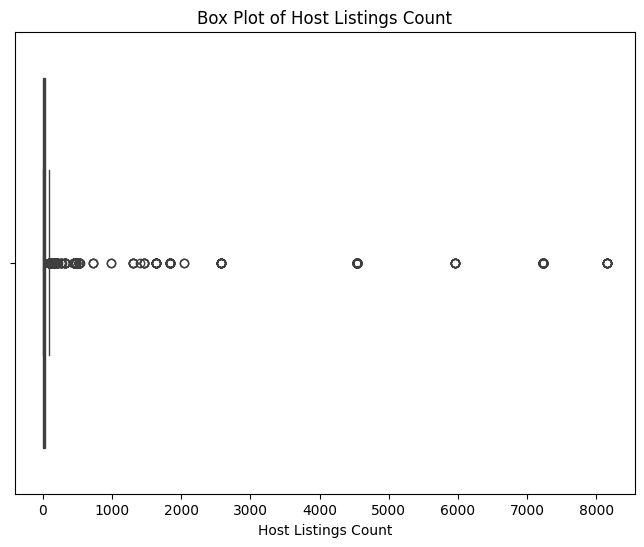

In [16]:
## Checking the outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['host_total_listings_count'])
plt.title('Box Plot of Host Listings Count')
plt.xlabel('Host Listings Count')
plt.show()

#### Encoding Categorical to Numerical 

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [27]:
#checking correlation
correlation_matrix = df.corr()
print(correlation_matrix)

ValueError: could not convert string to float: 'within an hour'